# SI 330 Final Project

Andrew Dicks

uniqname: ajamesd

https://www.kaggle.com/pschale/mlb-pitch-data-20152018#atbats.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.models.tools import HoverTool
output_notebook()
fig = figure()

Loading BokehJS ...

## Cleaning

In [3]:
pitches = pd.read_csv('data/mlb-pitch-data/pitches.csv')

In [4]:
pitches.head(2)

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0


In [5]:
atbats = pd.read_csv('data/mlb-pitch-data/atbats.csv')
players = pd.read_csv('data/mlb-pitch-data/player_names.csv')

In [6]:
atbats.head(1)

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True


In [7]:
players.head(1)

,id,first_name,last_name
0,452657,Jon,Lester


In [8]:
p_names = pd.merge(atbats, players, how='left', left_on='pitcher_id', right_on='id')
b_names = pd.merge(p_names, players, how='left', left_on='batter_id', right_on='id')

col = {"first_name_x": "p_firstname", "last_name_x": "p_lastname", "first_name_y": "b_firstname", "last_name_y": "b_lastname"}
batting = b_names.rename(columns=col)
batting = batting.drop(['id_x','id_y'], axis=1)
total = pd.merge(pitches, batting, how='right', left_on='ab_id', right_on='ab_id')

In [9]:
batting.head(2)

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top,p_firstname,p_lastname,b_firstname,b_lastname
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True,Jon,Lester,Matt,Carpenter
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True,Jon,Lester,Jason,Heyward


In [10]:
p = total[['inning', 'top', 'p_score', 'b_score', 'o', 'b_count', 's_count', 'event', 'pitch_num',
       'code', 'type', 'pitch_type',
       'pitcher_id', 'p_firstname', 'p_lastname', 'p_throws', 
       'batter_id', 'b_firstname', 'b_lastname', 'stand']]

In [11]:
# Most pitches thrown from 2015-2018
pitchers = pd.DataFrame()
pitchers['pitcher'] = p[['p_firstname','p_lastname']].apply(lambda x: ' '.join(x), axis=1)
pitchers['pitcher'].value_counts().head()

Max Scherzer        13534
Justin Verlander    12791
Chris Archer        12775
Jose Quintana       12763
Chris Sale          12707
Name: pitcher, dtype: int64

## Justin Verlander (a hero of mine)

As a lifelong Detroit Tigers fan, Justin Verlander is my all-time favorite baseball player. He was drafted by the Tigers second overall in the 2004 MLB draft. During his 12 seasons with the Tigers, he lead them to numerous playoff appearances as well as two World Series appearances. Because the Tigers are horrendous now, he currently plays for the Houston Astros. He will forever be a Tiger in my book and will always be my favorite player.

JV has had an incredible career that will eventually earn him a spot in the Hall of Fame. I am interested to see why he is so successful, and why he has been able to maintain his success even later in his career. I chose to visualize his pitches to see where he is attacking the strike zone, where pitches are being called strikes vs balls, and where he throws each type of his pitches.

In [12]:
jv = total[total['pitcher_id'] == 434378]
jv['pitcher'] = jv[['p_firstname','p_lastname']].apply(lambda x: ' '.join(x), axis=1)

jv = jv[['pitcher', 'inning', 'code', 'type', 'pitch_type', 'px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'type_confidence', 'ab_id', 'stand']]

pitch_result = {'S':'Strike', 'B':'Ball', 'X':'In Play'}
jv = jv.replace(to_replace={'type':pitch_result})
jv = jv.rename(columns={'type':'pitch_result'})
jv.head()

,pitcher,inning,code,pitch_result,pitch_type,px,pz,start_speed,end_speed,spin_rate,type_confidence,ab_id,stand
262214,Justin Verlander,1,S,Strike,FF,-0.503,2.362,92.1,84.7,2846.597,2.0,2.015069e+09,L
262215,Justin Verlander,1,B,Ball,FF,-0.412,1.298,92.0,84.6,2753.243,2.0,2.015069e+09,L
262216,Justin Verlander,1,X,In Play,CH,-0.227,1.667,84.7,78.7,2411.167,2.0,2.015069e+09,L
262217,Justin Verlander,1,B,Ball,FF,-1.342,3.408,92.5,85.8,2366.659,2.0,2.015069e+09,L
262218,Justin Verlander,1,S,Strike,FF,-1.164,2.798,92.8,85.5,2628.442,2.0,2.015069e+09,L


In [13]:
fig1 = figure()
fig1.circle('px', 'pz', source=jv[jv.pitch_result=='Strike'], color='red',size=5,legend="Strike")
fig1.circle('px', 'pz', source=jv[jv.pitch_result=='Ball'],color='blue',size=5,fill_alpha=0.1,legend="Ball")
fig1.circle('px', 'pz', source=jv[jv.pitch_result=='In Play'],color='green',size=5,fill_alpha=0.1,legend="In Play")
show(fig1)

This visualization maps the location of all of Justin Verlander's pitches from 2015-2018. X=0 marks the center of the plate and Y=0 marks the ground. Some data points have negative y values, meaning they hit the ground before reaching the plate. The red data points represent Strikes, the blue data points represent Balls, and the green represent pitches the were hit In Play by the batter.

In [14]:
jv[['season']] = jv['ab_id'].astype('str').str.extract('(?P<season>\d\d\d\d).+')

In [15]:
jv_pitches = {'FF': '4-Seam Fastball',
              'CH': 'Changeup',
              'CU': 'Curveball',
              'SL': 'Slider',
              'IN': 'Intentional Ball',
              'PO': 'Pitchout',
              'FT': '2-Seam Fastball',
              'FC': 'Cutter'
             }

In [16]:
jv = jv.replace(to_replace={'pitch_type':jv_pitches})

In [17]:
jv15 = jv[jv.season=='2015']
jv16 = jv[jv.season=='2016']
jv17 = jv[jv.season=='2017']
jv18 = jv[jv.season=='2018']

In [18]:
jv15['pitch_type'].value_counts()

4-Seam Fastball     1259
Slider               366
Curveball            325
Changeup             197
Intentional Ball       2
Pitchout               1
Name: pitch_type, dtype: int64

In [19]:
jv16['pitch_type'].value_counts()

4-Seam Fastball     2118
Slider               651
Curveball            583
Changeup             311
Intentional Ball       4
Pitchout               1
Name: pitch_type, dtype: int64

In [20]:
jv17['pitch_type'].value_counts()

4-Seam Fastball    2036
Slider              758
Curveball           565
Changeup            146
Cutter               14
2-Seam Fastball      12
Name: pitch_type, dtype: int64

In [21]:
jv18['pitch_type'].value_counts()

4-Seam Fastball    2093
Slider              762
Curveball           495
Changeup             51
Cutter               20
Name: pitch_type, dtype: int64

In [22]:
fig2 = figure()
fig2.circle('px', 'pz', source=jv16[jv16.pitch_type=='4-Seam Fastball'], color='red',size=5,legend="4-Seam Fastball")
fig2.circle('px', 'pz', source=jv16[jv16.pitch_type=='2-Seam Fastball'], color='orange',size=5,legend="2-Seam Fastball")
fig2.circle('px', 'pz', source=jv16[jv16.pitch_type=='Curveball'], color='yellow',size=5,legend="Curveball")
fig2.circle('px', 'pz', source=jv16[jv16.pitch_type=='Changeup'], color='green',size=5,legend="Changeup")
fig2.circle('px', 'pz', source=jv16[jv16.pitch_type=='Slider'], color='blue',size=5,legend="Slider")
fig2.circle('px', 'pz', source=jv16[jv16.pitch_type=='Cutter'], color='purple',size=5,legend="Cutter")
show(fig2)

In [23]:
fig3 = figure()
fig3.circle('px', 'pz', source=jv18[jv18.pitch_type=='4-Seam Fastball'], color='red',size=5,legend="4-Seam Fastball")
fig3.circle('px', 'pz', source=jv18[jv18.pitch_type=='2-Seam Fastball'], color='orange',size=5,legend="2-Seam Fastball")
fig3.circle('px', 'pz', source=jv18[jv18.pitch_type=='Curveball'], color='yellow',size=5,legend="Curveball")
fig3.circle('px', 'pz', source=jv18[jv18.pitch_type=='Changeup'], color='green',size=5,legend="Changeup")
fig3.circle('px', 'pz', source=jv18[jv18.pitch_type=='Slider'], color='blue',size=5,legend="Slider")
fig3.circle('px', 'pz', source=jv18[jv18.pitch_type=='Cutter'], color='purple',size=5,legend="Cutter")
show(fig3)

I wanted to make these visualizations because I thought they would help give a good understanding of the data behind pitching. When making the last two visualizations, I removed instances of 'Intentional Ball' and 'Pitchout' because they messed up the symmetry of the data. These visualizations are interesting to look at for a few reasons. The first is seeing the difference in pitching when the data is just two years apart. It's incredible to see how someone at the peak of their profession is still working to improve their craft. The most notable change for me is the positioning of the Slider. In 2016, it was kind of erratic, but in 2018, it is much more defined in the lower right corner of the strike zone. I also find it interesting to look at the types of pitches thrown and the number of times Verlander threw them. As he's progressed in his career, he has started throwing fewer changeups while maintaing consistent numbers on his 4-Seam Fastball. One caveat to note is that he was injured for 2.5 months at the start of the 2015 season, which is why his number are down that year.

There is a lot you can learn from visualizations and data like this, which is why Major League Baseball teams value analytics so highly. Being able to understand a pitcher's tendencies before you face him gives you an advantage at the plate. At the same time, pitchers know where they need to throw the ball to have the highest likelihood of getting the batter out.

## Pitchers vs Ballparks

Home field advantage is very important in all sports, but especially baseball, where each team's home field is unique. This raises the question of which parks are more conducive to hitting vs pitching. The best way to measure pitching performace is by analyzing the runs scored at each ballpark from 2015-2018.

In [24]:
games_df = pd.read_csv('data/mlb-pitch-data/games.csv')
games = games_df[['g_id','date','home_team','home_final_score','away_team','away_final_score','venue_name','weather','wind','umpire_HP']]
games.head(2)

,g_id,date,home_team,home_final_score,away_team,away_final_score,venue_name,weather,wind,umpire_HP
0,201500001,2015-04-05,chn,0,sln,3,Wrigley Field,"44 degrees, clear","7 mph, In from CF",Mike Winters
1,201500002,2015-04-06,sea,4,ana,1,Safeco Field,"54 degrees, cloudy","1 mph, Varies",Larry Vanover


In [25]:
games[['season']] = games['date'].str.extract('(?P<season>\d+).*')
games['total_runs'] = games['home_final_score'] + games['away_final_score']
games = games.replace(to_replace={'venue_name':['Angel Stadium of Anaheim','O.co Coliseum']},
                      value={'venue_name':['Angel Stadium','Oakland Coliseum']})
games.head()

,g_id,date,home_team,home_final_score,away_team,away_final_score,venue_name,weather,wind,umpire_HP,season,total_runs
0,201500001,2015-04-05,chn,0,sln,3,Wrigley Field,"44 degrees, clear","7 mph, In from CF",Mike Winters,2015,3
1,201500002,2015-04-06,sea,4,ana,1,Safeco Field,"54 degrees, cloudy","1 mph, Varies",Larry Vanover,2015,5
2,201500003,2015-04-06,mia,1,atl,2,Marlins Park,"80 degrees, partly cloudy","16 mph, In from CF",Jeff Nelson,2015,3
3,201500004,2015-04-06,tba,2,bal,6,Tropicana Field,"72 degrees, dome","0 mph, None",Dana DeMuth,2015,8
4,201500005,2015-04-06,phi,0,bos,8,Citizens Bank Park,"71 degrees, partly cloudy","11 mph, Out to RF",Gerry Davis,2015,8


In [26]:
season15 = games[games['season'] == '2015']
season16 = games[games['season'] == '2016']
season17 = games[games['season'] == '2017']
season18 = games[games['season'] == '2018']

In [27]:
venue_runs = games.pivot_table(values=['total_runs','home_final_score','away_final_score'], index='venue_name', aggfunc={np.nanmean,np.sum})

In [28]:
venue_runs_15 = season15.pivot_table(values=['total_runs','home_final_score','away_final_score'], index='venue_name', aggfunc={np.nanmean,np.sum})
venue_runs_16 = season16.pivot_table(values=['total_runs','home_final_score','away_final_score'], index='venue_name', aggfunc={np.nanmean,np.sum})
venue_runs_17 = season17.pivot_table(values=['total_runs','home_final_score','away_final_score'], index='venue_name', aggfunc={np.nanmean,np.sum})
venue_runs_18 = season18.pivot_table(values=['total_runs','home_final_score','away_final_score'], index='venue_name', aggfunc={np.nanmean,np.sum})

In [29]:
venue_runs['total_runs']['sum']

venue_name
AT&T Park                             2588
Angel Stadium                         2705
BB&T Ballpark                           10
Busch Stadium                         2667
Chase Field                           3131
Citi Field                            2579
Citizens Bank Park                    2842
Comerica Park                         3019
Coors Field                           3668
Dodger Stadium                        2542
Estadio de Beisbol Monterrey            18
Fenway Park                           3199
Fort Bragg Field                         7
Globe Life Park in Arlington          3404
Great American Ball Park              3137
Guaranteed Rate Field                 1494
Hiram Bithorn Stadium                   10
Kauffman Stadium                      2911
Marlins Park                          2540
Miller Park                           2899
Minute Maid Park                      2639
Nationals Park                        2879
Oakland Coliseum                      2831


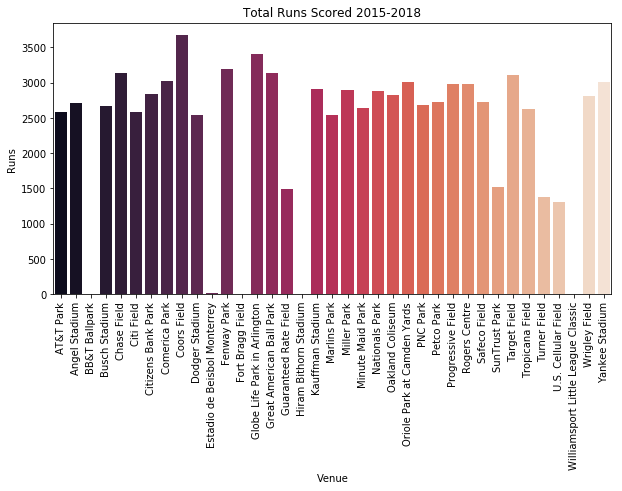

In [30]:
fig = plt.figure(figsize=(10,5))
x = venue_runs.index
y = venue_runs['total_runs']['sum']
ax = sns.barplot(x=x, y=y, palette="rocket")
ax.set(xlabel='Venue', ylabel='Runs', title='Total Runs Scored 2015-2018')
plt.xticks(rotation=90)
plt.show()

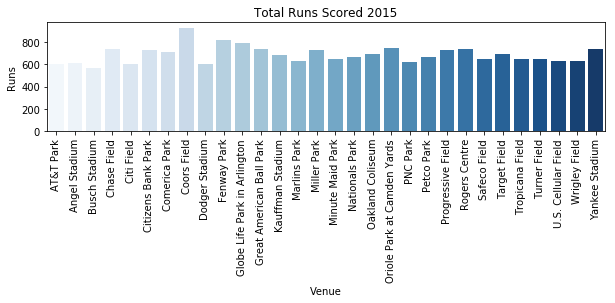

In [31]:
# season 2015
fig = plt.figure(figsize=(10,2))
x15 = venue_runs_15.index
y15 = venue_runs_15['total_runs']['sum']
ax = sns.barplot(x=x15, y=y15, palette="Blues")
ax.set(xlabel='Venue', ylabel='Runs', title='Total Runs Scored 2015')
plt.xticks(rotation=90)
plt.show()

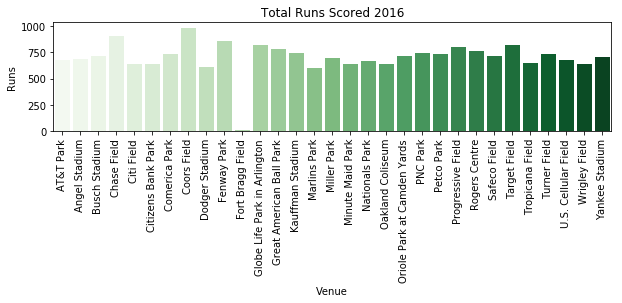

In [32]:
# season 2016
fig = plt.figure(figsize=(10,2))
x16 = venue_runs_16.index
y16 = venue_runs_16['total_runs']['sum']
ax = sns.barplot(x=x16, y=y16, palette="Greens")
ax.set(xlabel='Venue', ylabel='Runs', title='Total Runs Scored 2016')
plt.xticks(rotation=90)
plt.show()

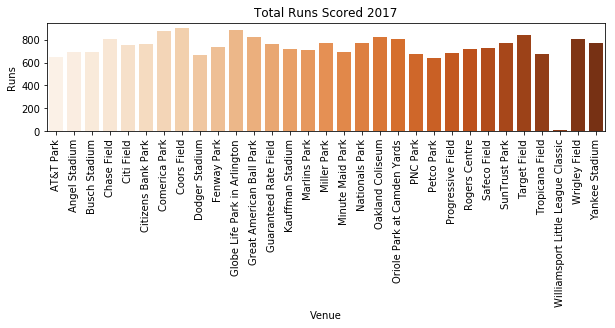

In [33]:
# season 2017
fig = plt.figure(figsize=(10,2))
x17 = venue_runs_17.index
y17 = venue_runs_17['total_runs']['sum']
ax = sns.barplot(x=x17, y=y17, palette="Oranges")
ax.set(xlabel='Venue', ylabel='Runs', title='Total Runs Scored 2017')
plt.xticks(rotation=90)
plt.show()

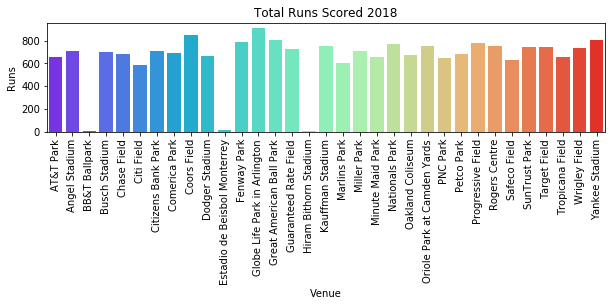

In [34]:
# season 2018
fig = plt.figure(figsize=(10,2))
x18 = venue_runs_18.index
y18 = venue_runs_18['total_runs']['sum']
ax = sns.barplot(x=x18, y=y18, palette="rainbow")
ax.set(xlabel='Venue', ylabel='Runs', title='Total Runs Scored 2018')
plt.xticks(rotation=90)
plt.show()

Because Coors Park is consistently in the range of parks where the most runs are scored, and because since 2015, they have had more runs scored there than any other ballpark, we can conclude that it is the least pitcher friendly. We can take a look at individual games to see how the Rockies stack up against the competition.

In [35]:
rockies = games[games['home_team'] == 'col']

In [36]:
rockies['temp'] = rockies['weather'].str.extract('(?P<season>\d+).*')

In [37]:
teams = {'ana':'Angels',
         'ari':'Diamondbacks',
         'atl':'Braves',
         'bal':'Orioles',
         'bos':'Red Sox',
         'cha':'White Sox',
         'chn':'Cubs',
         'cin':'Reds',
         'cle':'Indians',
         'col':'Rockies',
         'det':'Tigers',
         'hou':'Astros',
         'kca':'Royals',
         'lan':'Dodgers',
         'mia':'Marlins',
         'mil':'Brewers',
         'min':'Twins',
         'nya':'Yankees',
         'nyn':'Mets',
         'oak':'Athletics',
         'phi':'Phillies',
         'pit':'Pirates',
         'sdn':'Padres',
         'sea':'Mariners',
         'sfn':'Giants',
         'sln':'Cardinals',
         'tba':'Rays',
         'tex':'Rangers',
         'tor':'Blue Jays',
         'was':'Nationals',
        }

In [38]:
rockies = rockies.replace(to_replace={'home_team':teams,'away_team':teams})

In [39]:
p = figure(plot_width=400, plot_height=400)

p.circle('temp', 'total_runs', source=rockies, color="purple", size=5, alpha=0.6)

tooltips = [
            ('Rockies','@home_final_score'),
            ('Away', '@away_final_score (@away_team)'),
            ('Total Runs', '@total_runs'),
            ('Temperature', '@temp degrees'),
            ('Date', '@date')
           ]

p.add_tools(HoverTool(tooltips=tooltips))

show(p)

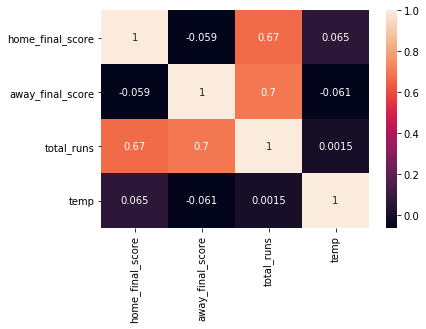

In [40]:
rockies = rockies.astype({'temp': 'int'})
rockies_corr = rockies[['home_final_score', 'away_final_score', 'total_runs', 'temp']].corr()
sns.heatmap(rockies_corr, annot=True)

This visualization shows all the Colorado Rockies scores from 2015-2018. Because Denver has such a high altitude, it is notoriously easy to hit homeruns at their ballparks. This poses as a challenge to pitchers, as shown in the data from the previous 4 seasons. Each data point on the scatterplot represents a home game for the Rockies. On the x-axis is the outdoor temperature in farenheit at which the game was played, and the y-axis shows the total number of runs scored in the game. As you can see, the seems to be a positive correlation between the two variables. This makes sense, as baseballs travel farther in warmer weather. The heatmap above shows this positive correlation, and while it isn't a large percentage, we can see that it is positive. One aspect of this plot that struck me was that in the span of 4 seasons, the Rockies only played two home games that finished with a cumulative run total of below 3 runs.

## Cy Young Winners

In [41]:
URL = 'https://www.baseball-reference.com/bullpen/Cy_Young_Award'

In [42]:
tables = pd.read_html(URL,attrs={'border':'2','cellpadding':'4','cellspacing':'0','style':'margin: 1em 1em 1em 0; background: #F9F9F9; border: 1px #aaa solid; border-collapse: collapse;'})
cy_young = tables[1]

new_col = ['year', 'AL player', 'team_al', 'record_al', 'saves_al', 'era_al', 'NL player', 'team_nl', 'record_nl', 'saves_nl', 'era_nl']
col = list(cy_young.columns)
rename_col = dict(zip(col,new_col))
cy_young = cy_young.rename(columns=rename_col)
cy_young = cy_young.drop([0,1])
cy_young['year'] = cy_young['year'].str.extract('(?P<year>....)')

# American League
al_cy_young = cy_young[['AL player','team_al','record_al','saves_al','era_al']]
al_cy_young = al_cy_young.rename(columns=dict(zip(['AL player','team_al','record_al','saves_al','era_al'],
                                                  ['Player','Team','Record','Saves','ERA'])))
al_cy_young = al_cy_young.drop(labels=[2,3,4], axis=0)
# fix tie in 1969
al_cy_young = pd.DataFrame(np.array([['Jim Lonborg', 'Boston Red Sox', '22-9', '0', '3.16'],
                                     ['Denny McLain', 'Detroit Tigers', '31-6', '0', '1.96'],
                                     ['Mike Cuellar', 'Baltimore Orioles', '23-11', '0', '2.38'],
                                     ['Denny McLain', 'Detroit Tigers', '24-9', '0', '2.80']]),
                           columns=['Player', 'Team', 'Record', 'Saves', 'ERA']).append(al_cy_young, ignore_index=True)
al_cy_young['League'] = 'AL'

# National League
nl_cy_young = cy_young[['NL player','team_nl','record_nl','saves_nl','era_nl']]
nl_cy_young = nl_cy_young.rename(columns=dict(zip(['NL player','team_nl','record_nl','saves_nl','era_nl'],
                                                  ['Player','Team','Record','Saves','ERA'])))
nl_cy_young = nl_cy_young.reset_index().drop('index', axis=1)
nl_cy_young['League'] = 'NL'

In [43]:
al_cy_young['Player'].value_counts().head()

Roger Clemens       6
Jim Palmer          3
Pedro Martínez      2
Justin Verlander    2
Bret Saberhagen     2
Name: Player, dtype: int64

In [44]:
nl_cy_young['Player'].value_counts().head()

Randy Johnson      4
Greg Maddux        4
Steve Carlton      4
Clayton Kershaw    3
Tom Seaver         3
Name: Player, dtype: int64

In [45]:
leagues = [al_cy_young, nl_cy_young]
league_cy_young = pd.concat(leagues)
league_cy_young = league_cy_young.reset_index().drop('index', axis=1)
league_cy_young[['Wins', 'Losses']] = league_cy_young['Record'].str.extract('(?P<Wins>\d+).(?P<Losses>\d+)')
league_cy_young = league_cy_young.astype({'ERA': 'float', 'Wins': 'int', 'Losses': 'int'})

In [46]:
league_cy_young['Player'].value_counts().head()

Roger Clemens      7
Randy Johnson      5
Greg Maddux        4
Steve Carlton      4
Clayton Kershaw    3
Name: Player, dtype: int64

In [47]:
league_cy_young['Team'].value_counts().head()

New York Mets            7
Philadelphia Phillies    7
Boston Red Sox           7
Los Angeles Dodgers      7
Baltimore Orioles        6
Name: Team, dtype: int64

In [48]:
league_cy_young['ERA'].values.mean()

2.4806542056074763

In [49]:
league_cy_young['Wins'].values.mean()

19.60747663551402

In [50]:
league_cy_young['Losses'].values.mean()

7.168224299065421

In [51]:
al = league_cy_young[league_cy_young['League'] == 'AL']
print(al['ERA'].values.mean())
print(al['Wins'].values.mean())
print(al['Losses'].values.mean())

2.5753703703703703
20.51851851851852
6.944444444444445


In [52]:
nl = league_cy_young[league_cy_young['League'] == 'NL']
print(nl['ERA'].values.mean())
print(nl['Wins'].values.mean())
print(nl['Losses'].values.mean())

2.3841509433962265
18.67924528301887
7.39622641509434


The Cy Young award is given annually to the best pitcher in both the American League and the National League. The most recent winner from the 2019 season are Justin Verlander (AL) and Jacob DeGrom (NL). It is both pitchers second time winning the pretigious award. Roger Clemens has won the award more times than anyone (7), doing so with four different teams. There is a 4-way tie for the teams that have had players win the award the most times. The Phillies, Dodgers, Mets, and Red Sox have all had 7 Cy Young winners. The most interesting aspect of this data is looking at the average for all past winners. On average, Cy Young award winners have an ERA of 2.48 and have accumulated an overall record of 19.61 wins and 7.17 losses. These number differ by league. The American League winners have a higher ERA, with an average of 2.58, and a record of 20.52-6.94, while the National League winners have an average ERA of 2.38 and a record of 18.68-7.40. The higher AL average ERA makes sense because AL pitchers don't face other pitchers. In the AL, pitchers don;t hit, the team sends a Designated Hitter to the plate in their place. This makes the job of AL pitchers more difficult because they don't get the easy-out of facing an opposing pitcher.